# Regresión Polinómica

In [45]:
# Importar el dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[, 2:3]

In [46]:
dataset

Level,Salary
<int>,<int>
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000


In [47]:
# Dividir los datos en conjunto de entrenamiento y conjunto de test
# install.packages("caTools")
# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Purchased, SplitRatio = 0.8)
# training_set = subset(dataset, split == TRUE)
# testing_set = subset(dataset, split == FALSE)


In [48]:
# Escalado de valores
# training_set[,2:3] = scale(training_set[,2:3])
# testing_set[,2:3] = scale(testing_set[,2:3])

In [49]:
lin_reg = lm(formula = Salary ~ ., 
             data = dataset)

In [50]:
lin_reg


Call:
lm(formula = Salary ~ ., data = dataset)

Coefficients:
(Intercept)        Level  
    -195333        80879  


In [53]:
summary(lin_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


In [54]:
dataset$Level2 = dataset$Level^2

In [55]:
dataset

Level,Salary,Level2
<int>,<int>,<dbl>
1,45000,1
2,50000,4
3,60000,9
4,80000,16
5,110000,25
6,150000,36
7,200000,49
8,300000,64
9,500000,81


In [56]:
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4

In [57]:
dataset

Level,Salary,Level2,Level3,Level4
<int>,<int>,<dbl>,<dbl>,<dbl>
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296
7,200000,49,343,2401
8,300000,64,512,4096
9,500000,81,729,6561


In [58]:
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

In [59]:
summary(poly_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
     1      2      3      4      5      6      7      8      9     10 
 -8357  18240   1358 -14633 -11725   6725  15997  10006 -28695  11084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  184166.7    67768.0   2.718  0.04189 * 
Level       -211002.3    76382.2  -2.762  0.03972 * 
Level2        94765.4    26454.2   3.582  0.01584 * 
Level3       -15463.3     3535.0  -4.374  0.00719 **
Level4          890.2      159.8   5.570  0.00257 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20510 on 5 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9953 
F-statistic: 478.1 on 4 and 5 DF,  p-value: 1.213e-06


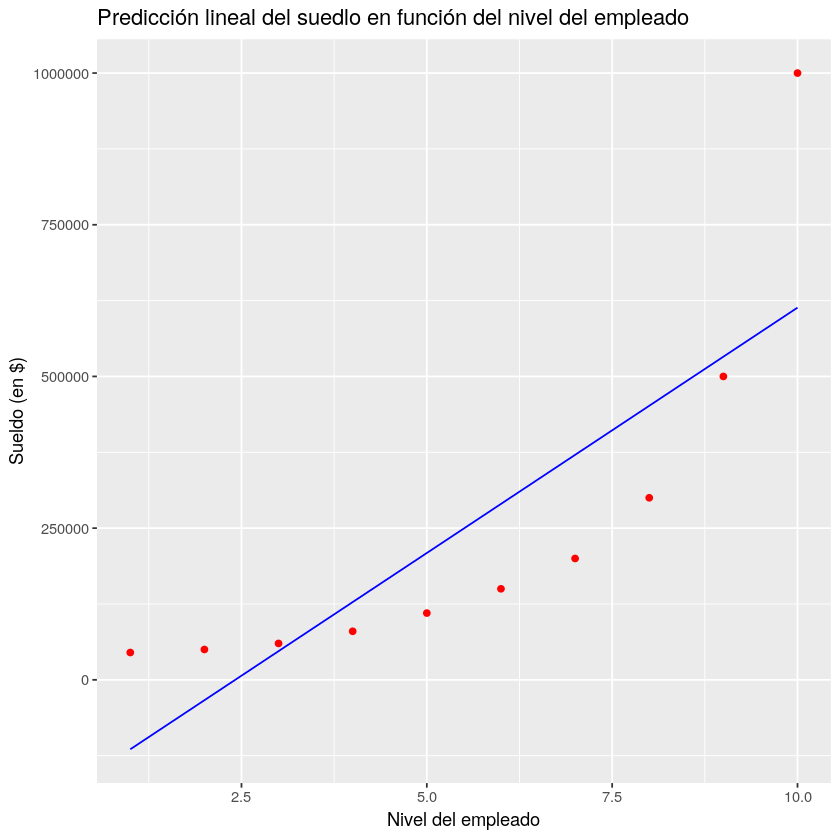

In [62]:
library(ggplot2)
ggplot() +
    geom_point(aes(x = dataset$Level , 
                   y = dataset$Salary),
                   color = "red") +
    geom_line(aes(x = dataset$Level, 
                  y = predict(lin_reg, 
            newdata = dataset)),
            color   = "blue") +
    
ggtitle("Predicción lineal del suedlo en función del nivel del empleado") +
xlab("Nivel del empleado") +
ylab("Sueldo (en $)")


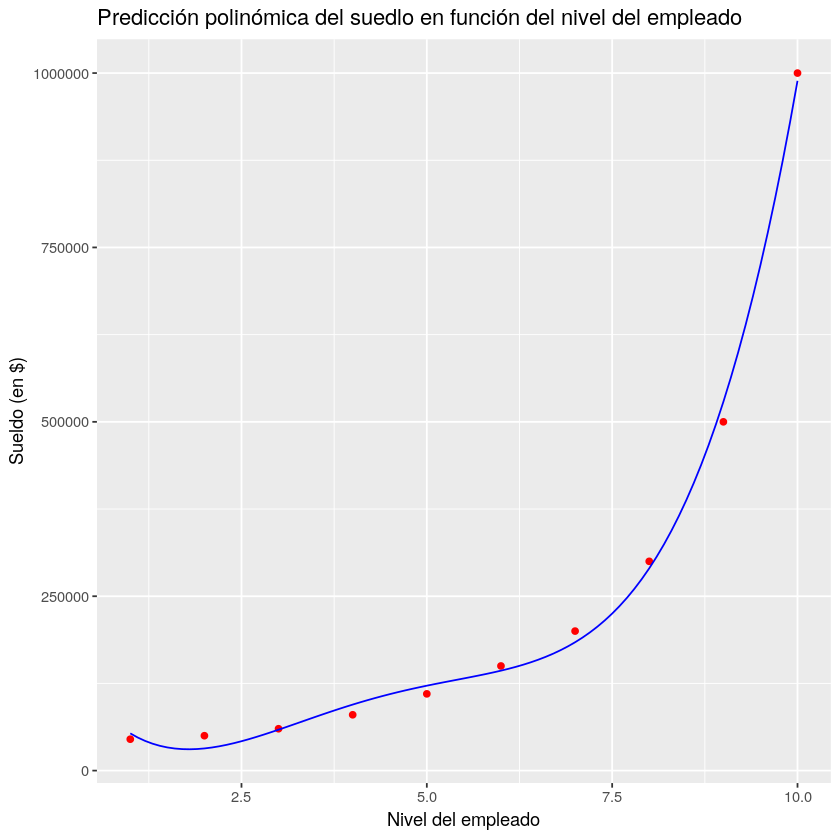

In [61]:
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level , y = dataset$Salary),
             color = "red") +
  geom_line(aes(x = x_grid, y = predict(poly_reg, 
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4))),
            color = "blue") +
  ggtitle("Predicción polinómica del suedlo en función del nivel del empleado") +
  xlab("Nivel del empleado") +
  ylab("Sueldo (en $)")

In [14]:
y_pred = predict(lin_reg, newdata = data.frame(Level = 6.5))

In [16]:
y_pred

1 
330378.8

In [15]:
# Predicción de nuevos resultados con Regresión Polinómica
y_pred_poly = predict(poly_reg, newdata = data.frame(Level = 6.5,
                                                Level2 = 6.5^2,
                                                Level3 = 6.5^3,
                                                Level4 = 6.5^4))

In [17]:
y_pred_poly

1 
158862.5